In [35]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

In [36]:
import os 
os.chdir("C:/Users/chenh/Desktop/y2s3/UCCC2513 Mini Project/Week 6")

# Question 1

In [37]:
img=cv.imread('boat.jpg', 0)


ret, th = cv.threshold(img, 0, 255, cv.THRESH_OTSU)

contours, _ = cv.findContours(th, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
for c in contours:
    rect = cv.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    print(cv.contourArea(c))
    x,y,w,h = rect
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv.putText(img,'Boat Detected',(x+w+10,y+h),0,0.3,(0,255,0))

cv.imshow("Boat with bounding Box",img)
cv.waitKey()  
cv.destroyAllWindows()



18088.5
393471.0


# Question 2

In [38]:
# leaf.jfif as input
img=cv.imread('leaf.jfif', 0)
blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# use trackbar to control size of structuring element - kernel
def trackbar(x):
    kernel = np.ones((x,x), np.uint8)
    erosion = cv.erode(img_binary, kernel, iterations = 1)
    combined_images = np.hstack((img_binary, erosion))
    cv.imshow('Erosion',combined_images)
    
cv.namedWindow('Erosion')
cv.createTrackbar('Threshold', 'Erosion', 1, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

# Question 3

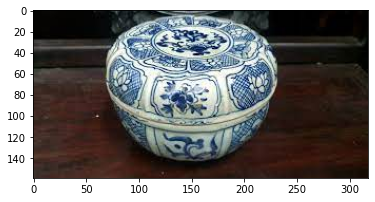

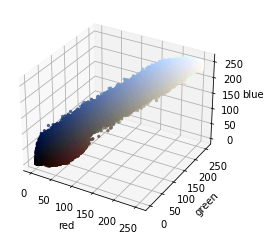

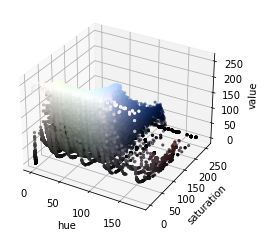

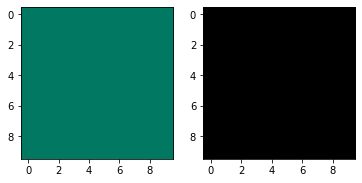

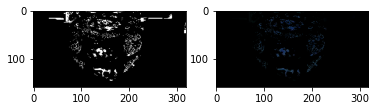

In [34]:
img=cv.imread('porcelain1.jfif')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

r,g,b = cv.split(img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

pixel_colors = img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin=0., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('red')
axis.set_ylabel('green')
axis.set_zlabel('blue')

plt.show()

img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

r,g,b = cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')

plt.show()

blue_low = (70, 120, 0)
blue_high = (120, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

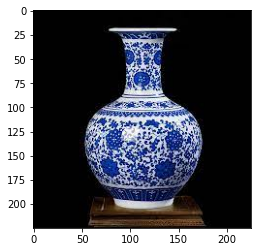

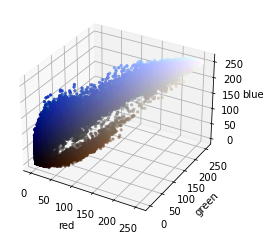

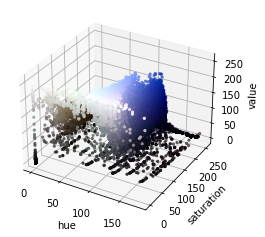

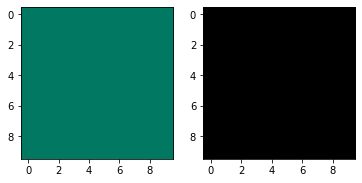

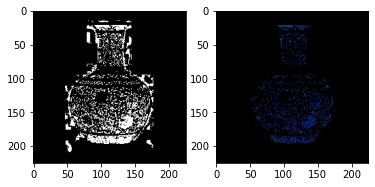

In [28]:
img=cv.imread('porcelain2.jfif')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

r,g,b = cv.split(img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

pixel_colors = img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin=0., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('red')
axis.set_ylabel('green')
axis.set_zlabel('blue')

plt.show()

img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

r,g,b = cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')

plt.show()

blue_low = (70, 120, 0)
blue_high = (120, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()


mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

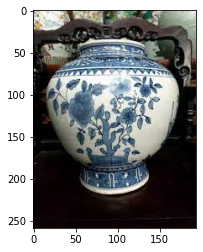

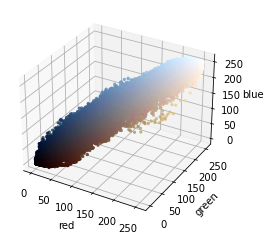

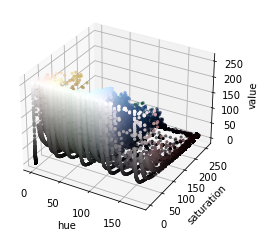

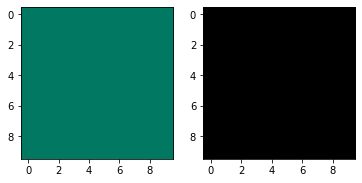

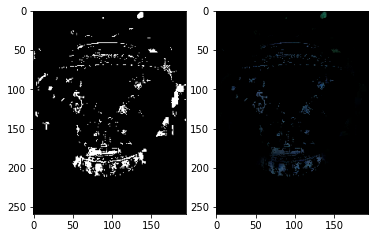

In [29]:
img=cv.imread('porcelain3.jfif')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

r,g,b = cv.split(img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

pixel_colors = img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin=0., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('red')
axis.set_ylabel('green')
axis.set_zlabel('blue')

plt.show()

img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

r,g,b = cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')

plt.show()

blue_low = (70, 120, 0)
blue_high = (120, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

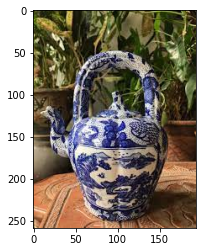

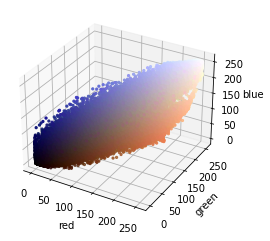

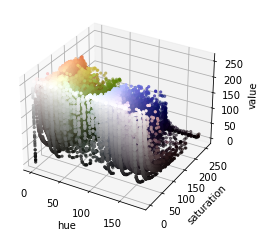

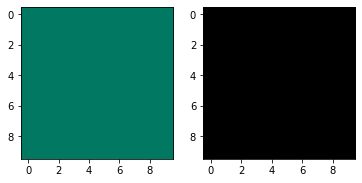

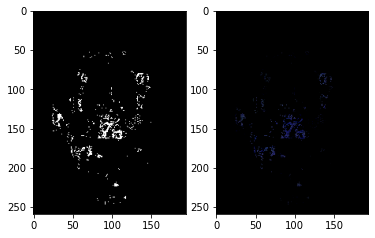

In [22]:
# load image
img=cv.imread('porcelain4.jfif')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# plot the pixels in 3D scatter plot
r,g,b = cv.split(img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

# normalize the color
pixel_colors = img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin=0., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('red')
axis.set_ylabel('green')
axis.set_zlabel('blue')

plt.show()

# convert image to HSV 
img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

r,g,b = cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')

plt.show()

# selecting low and high values as threshold
# and verify it
blue_low = (70, 120, 0)
blue_high = (120, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

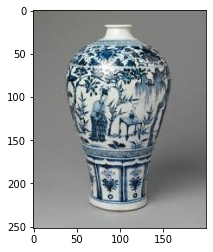

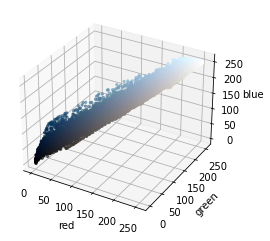

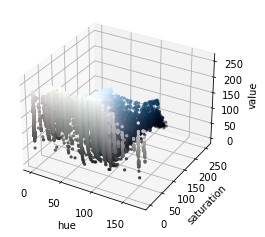

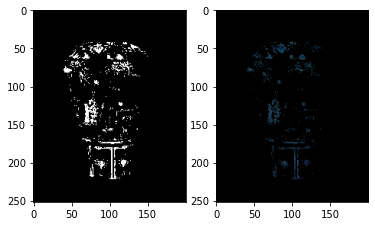

In [30]:
img=cv.imread('porcelain5.jfif')
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

r,g,b = cv.split(img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

pixel_colors = img.reshape(img.shape[0]*img.shape[1], 3)
norm = colors.Normalize(vmin=0., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('red')
axis.set_ylabel('green')
axis.set_zlabel('blue')

plt.show()

img_hsv=cv.cvtColor(img, cv.COLOR_RGB2HSV)

r,g,b = cv.split(img_hsv)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection='3d')

axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolor=pixel_colors, marker=".")# ravel to flatten the array
axis.set_xlabel('hue')
axis.set_ylabel('saturation')
axis.set_zlabel('value')

plt.show()

blue_low = (70, 120, 0)
blue_high = (120, 255, 120)

mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()